In [3]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest.zip

--2023-05-09 18:00:46--  https://files.grouplens.org/datasets/movielens/ml-latest.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277113433 (264M) [application/zip]
Saving to: ‘ml-latest.zip’

ml-latest.zip       100%[===================>] 264.28M   137MB/s    in 1.9s    

2023-05-09 18:00:49 (137 MB/s) - ‘ml-latest.zip’ saved [277113433/277113433]



In [4]:
!unzip ml-latest.zip

Archive:  ml-latest.zip
   creating: ml-latest/
  inflating: ml-latest/links.csv     
  inflating: ml-latest/tags.csv      
  inflating: ml-latest/genome-tags.csv  
  inflating: ml-latest/ratings.csv   
  inflating: ml-latest/README.txt    
  inflating: ml-latest/genome-scores.csv  
  inflating: ml-latest/movies.csv    


In [5]:
import pandas as pd

In [6]:
scores = pd.read_csv("ml-latest/genome-scores.csv")
scores.head()

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000


array([[<AxesSubplot: title={'center': 'relevance'}>]], dtype=object)

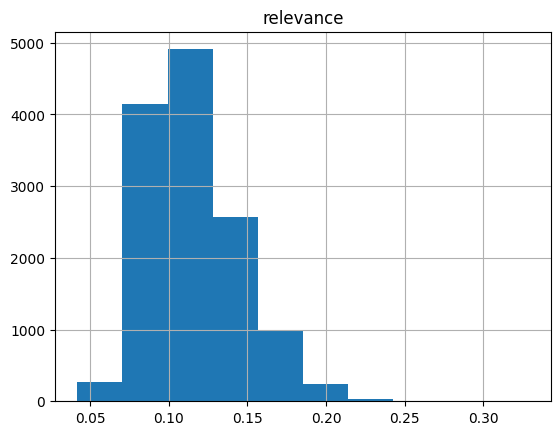

In [7]:
scores[["movieId", "relevance"]].groupby(['movieId']).mean().hist()

array([[<AxesSubplot: title={'center': 'relevance'}>]], dtype=object)

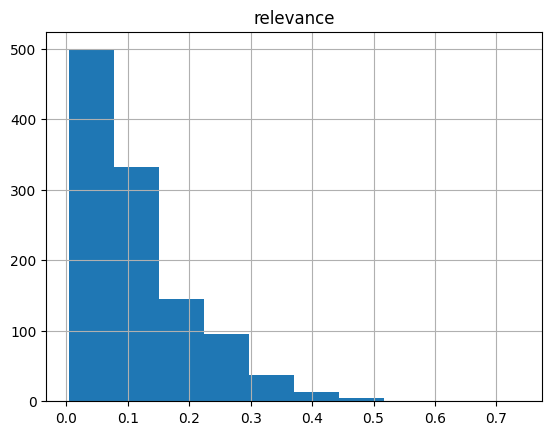

In [8]:
scores[["tagId", "relevance"]].groupby(['tagId']).mean().hist()

In [9]:
df = scores[["tagId", "relevance"]].groupby(['tagId']).mean()
df.sort_values(["relevance"], ascending=False)

,relevance
tagId,
742,0.737600
646,0.532317
188,0.483031
972,0.477440
468,0.452478
...,...
657,0.007744
976,0.007502
573,0.007026


In [10]:
tag = pd.read_csv("ml-latest/genome-tags.csv")
tag.tail()

,tagId,tag
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie
1127,1128,zombies


In [11]:
print("Popular tags:", ", ".join(tag[tag['tagId'].isin([742, 646, 188, 972, 468])]["tag"]))
print("Unpopular tags:", ", ".join(tag[tag['tagId'].isin([657, 976, 573, 119, 489])]["tag"]))

Popular tags: catastrophe, great ending, mentor, original, storytelling
Unpopular tags: beatles, hannibal lecter, james bond, miyazaki, studio ghibli


Можно заметить, что теги в топе обобщенные, а в самом низу узконаправленные, например, конкретная студия.

In [12]:
movies = pd.read_csv("ml-latest/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
from collections import Counter

In [14]:
def display_count(d: dict):
  for k, v in d:
    print(f"{k}: {v}")

In [15]:
movies[movies["genres"]=="(no genres listed)"]

,movieId,title,genres
16662,83773,Away with Words (San tiao ren) (1999),(no genres listed)
16677,83829,Scorpio Rising (1964),(no genres listed)
16856,84768,Glitterbug (1994),(no genres listed)
17178,86493,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed)
17343,87061,Trails (Veredas) (1978),(no genres listed)
...,...,...,...
58064,193815,Tempting Fate (1998),(no genres listed)
58079,193849,Rafinha Bastos: Ultimatum (2018),(no genres listed)
58082,193855,"Spring Night, Summer Night (1967)",(no genres listed)
58090,193870,Isabelle Eberhardt (1991),(no genres listed)


In [16]:
genres = Counter()
for g in  movies["genres"]:
  genres.update(Counter(g.split("|")))
display_count(genres.most_common())

Drama: 24144
Comedy: 15956
Thriller: 8216
Romance: 7412
Action: 7130
Horror: 5555
Documentary: 5118
Crime: 5105
(no genres listed): 4266
Adventure: 4067
Sci-Fi: 3444
Mystery: 2773
Children: 2749
Animation: 2663
Fantasy: 2637
War: 1820
Western: 1378
Musical: 1113
Film-Noir: 364
IMAX: 197


Можем (no genres listed) просто удалить.


In [17]:
ratings = pd.read_csv("ml-latest/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


array([[<AxesSubplot: title={'center': 'rating'}>]], dtype=object)

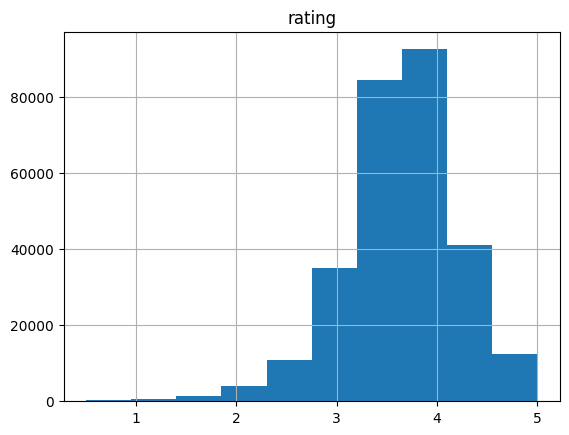

In [18]:
ratings[["userId", "rating"]].groupby(['userId']).mean().hist()

array([[<AxesSubplot: title={'center': 'rating'}>]], dtype=object)

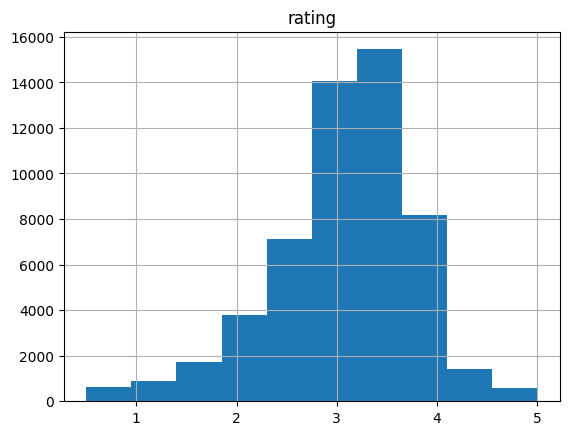

In [19]:
ratings[["movieId", "rating"]].groupby(['movieId']).mean().hist()

In [20]:
user_tags = pd.read_csv("ml-latest/tags.csv")
user_tags.head()

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [21]:
all_user_tags = Counter(user_tags["tag"].str.lower())

In [22]:
print("all user tags:", len(user_tags))
print("unique tags:", len(all_user_tags))
print("unique tags(more than 1):", sum(v != 1 for k, v in all_user_tags.items()))

all user tags: 1108997
unique tags: 66982
unique tags(more than 1): 34537


In [23]:
display_count(all_user_tags.most_common(10))

sci-fi: 9953
action: 7232
atmospheric: 6995
comedy: 6681
surreal: 5572
funny: 5560
based on a book: 5414
twist ending: 4944
romance: 4613
visually appealing: 4491


In [24]:
display_count(all_user_tags.most_common()[:-20:-1])

lense flare: 1
black holes don't work like that: 1
i think i'm going to vomit: 1
sucked for the husband: 1
best of the trilogy: 1
bad but enjoyable: 1
didn't deserve oscar: 1
unlikable love interest: 1
poor gay dude: 1
kurt russell < rda: 1
that'll do pig: 1
straight hilarious: 1
especially when they are hella high.: 1
wannabe-funny: 1
ø§ø­ø³ø§ø³ø§øªùš: 1
vanxo: 1
truly awful adaptation: 1
movie version is about judas: 1
riff trax fodder: 1


Предварительно надо почистить данные. Стоит удалить теги, где используются символы не из ascii и неопознанные слова.

## **Baseline**



Вспомним основы рекомендательных систем. Можно представить рейтинги как разряженную матрицу, где в качестве строк выступают users, столбцы - movies, а в самой таблице указаны рейтинги, какую оценку дал фильму пользователь. 

Далее, используя сингулярное разложение, представляем матрицу (MxN) в виде произведения трех - USV*.

U будет размера MxK, 
V размера NxK

И найти рейтинг товара j оцененное i пользователем можем через скалярное произведение U[i]xV[j]

По сути, строки этих матриц и будут эмбедингами. попробуем сделать аналогию на нейросетях


#### **Подготовка данных**

Разделим данные по хронологии (по времени выставления рейтинга, ). Чтобы мы могли рекомендовать фильм, лучше иметь оценки от пользователей. 

Можно еще разбить так, что для некоторых фильмов не было оценок и попытаться предсказывать их рейтинг, но сейчас я этот вариант не буду рассматривать

In [25]:
from sklearn import metrics, preprocessing
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [26]:
r = preprocessing.MinMaxScaler(feature_range=(0.1,1)).fit_transform(ratings["rating"].values.reshape(-1,1))
ratings["rating"] = r.reshape(r.shape[0])
ratings = ratings[ratings["userId"].isin(range(1, 70001))]
id2idx = {v:i for i, v in enumerate(ratings["movieId"].unique())}

In [27]:
split_by_column = "userId"
ratio = [0.75, 0.25]
data = ratings.sort_values([split_by_column, "timestamp"])

groups = data.groupby(split_by_column)

data["count"] = groups[split_by_column].transform("count")
data["rank"] = groups.cumcount() + 1

splits = []
prev_threshold = None
for threshold in np.cumsum(ratio):
    condition = data["rank"] <= round(threshold * data["count"])
    if prev_threshold is not None:
        condition &= data["rank"] > round(prev_threshold * data["count"])
    splits.append(data[condition].drop(["rank", "count"], axis=1))
    prev_threshold = threshold

In [28]:
count_users = ratings["userId"].unique().size
count_movies = ratings["movieId"].unique().size
train, test = splits

In [29]:
ratings

,userId,movieId,rating,timestamp
0,1,307,0.7,1256677221
1,1,481,0.7,1256677456
2,1,1091,0.3,1256677471
3,1,1257,0.9,1256677460
4,1,1449,0.9,1256677264
...,...,...,...,...
6816327,70000,7842,1.0,1135756324
6816328,70000,8376,1.0,1135756301
6816329,70000,8623,0.8,1135756295
6816330,70000,30810,1.0,1135756306


In [30]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

random.seed(1234)
torch.manual_seed(1)

In [31]:
class RatingDataset(Dataset):
    def __init__(self, data, id2indx):
        self.data = data
        self.id2indx = id2indx

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return torch.tensor([row.userId-1, self.id2indx[row.movieId]], dtype=torch.long), row.rating
    
dataset = RatingDataset(train, id2idx)
test_ds = RatingDataset(test, id2idx)
loader = DataLoader(dataset, batch_size=256)
test_loader = DataLoader(test_ds, batch_size=len(test_ds))

In [32]:
torch.cuda.is_available()

True

In [33]:
class SimpleModel(nn.Module):
    def __init__(self, user_size, product_size, embedding_dim):
        super().__init__()
        self.emb_dim = embedding_dim
        self.embed_user = nn.Embedding(user_size, embedding_dim)
        self.embed_product = nn.Embedding(product_size, embedding_dim)
        self.fc1=nn.Linear(1, 1)
        self.sigm = nn.Sigmoid()

    def forward(self, inputs):
        user = self.embed_user(inputs[0])
        product = self.embed_product(inputs[1])
        raiting = torch.sum(user*product, 1)
        out = self.fc1(raiting.view(-1,1,1))
        return self.sigm(out)

In [34]:
# !cat ml-latest/README.txt

In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [36]:
EMBEDDING_DIM = 60
model = SimpleModel(count_users, count_movies, EMBEDDING_DIM)
model.to(device)

SimpleModel(
  (embed_user): Embedding(70000, 60)
  (embed_product): Embedding(36633, 60)
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (sigm): Sigmoid()
)

In [37]:
ls

__notebook_source__.ipynb  ml-latest/  ml-latest.zip


In [ ]:
loss = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
losses = []
EPOCHS = 40

for epoch in range(EPOCHS):
    total_loss = 0
    for inputs, outputs in loader:
      model.zero_grad()
      pred = model(inputs.T.to(device))

      err = loss(outputs.to(device), pred.view(-1))
      err.backward()

      optimizer.step()
      total_loss += err.item()
    losses.append(total_loss)
    print(total_loss)

In [ ]:
# Additional information
EPOCH = 3
PATH = "model.pt"
LOSS = losses[-1]

torch.save({
    'epoch': EPOCH,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': LOSS,
}, PATH)

Для оценки качества модели буду использовать Mean reciprocal rank. Метрика показывает, что чем больше определено фильмов в топе, учитывая порядок, тем больше score.

In [ ]:
def MRR(y_test, pred):
    assert len(y_test)==len(pred)
    score = []
    for el in y_test:
        mrr = 1 / (list(pred).index(el) + 1) if el in pred else 0
        score.append(mrr)
    return np.mean(score)

In [ ]:
model = SimpleModel(count_users, count_movies, EMBEDDING_DIM)
optimizer = optim.Adam(model.parameters(), lr=0.001)

checkpoint = torch.load("model.pt", map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

In [ ]:
test_data = next(iter(test_loader))
model.eval()
with torch.no_grad():
    out_data = model(test_data[0].T)

result = torch.cat([test_data[0],test_data[1].view((-1,1)), out_data.view((-1,1))], 1)
px = pd.DataFrame(result.numpy())

In [ ]:
px = px.reset_index().rename(columns={0:"userId", 1: "movieId", 2: "rating", 3: "predict"})

In [ ]:
px = px.drop(columns=["index"])
px

In [ ]:
px["count"] = px.groupby(["userId"])["userId"].transform("count")
(px["count"]>3).sum()

Для каждого пользователя попробуем оценить,насколько хорошо модель предлагает топ 3 фильма

In [ ]:
list_mrr = []
true_pos = []

K_TOP = 3
userIds = px["userId"].unique()
for userId in userIds:
    true_y = list(px[px["userId"]==userId].sort_values(["rating"],ascending=False)["movieId"][:K_TOP])
    pred = list(px[px["userId"]==userId].sort_values(["predict"],ascending=False)["movieId"][:K_TOP])
    list_mrr.append(MRR(list(true_y), list(pred)))
    true_pos.append(len(set(true_y)&set(pred))/len(pred))

In [ ]:
sum(list_mrr)/len(list_mrr)

In [ ]:
sum(true_pos)/len(true_pos)

# Результат: 
###     - модель в среднем угадывает 45% в топ 3
###     - MRR в среднем 0.31

###  TODO:

- увеличить число эпох
- изначально хотела использовать 
https://github.com/microsoft/recommenders/blob/fdac1bccfaa9345d8cfc0f14442b5ef00a93ece0/examples/00_quick_start/ncf_movielens.ipynb
для бейзлайна, но у меня нет вычеслительных ресурсов
- использовать дополнительные данные в виде timestamps, tags, время создания фильма, предварительный анализ. Усложнение модели - нужны вычислительные ресурсы и больше времени